# Dirichlet distribution

Dirichlet distribution is a distribution over the probabilities of experiments with categorical outcomes. If there are $K$ possible outcomes, the random random variable vector $\mathbf{x} = (x_1, \ldots, x_K)^T$ contains the probabilities for each outcome. The probabilities have to add to one. Because of the constraints $\mathbf{x}$ can only lie in a subset of the space of vectors of length $K$. For $K=3$, this is illustrated at the end of this notebook. $\mathbf{x}$ lies on the face of the shown triangle. The generalization to higher dimensions is known as a simplex. For $K=3$ the 2-simplex is the triangle.

The probability density function is given by
\begin{equation}
\textrm{Dir}(\mathbf{x}|\boldsymbol{\alpha}) = \frac{\Gamma(\alpha_1 + \cdots + \alpha_K)} {\Gamma(\alpha_1) \cdots \Gamma(\alpha_K)} \prod_{k=1}^K x_k^{\alpha_k-1}.
\end{equation}
The parameters $\boldsymbol{\alpha} = (\alpha_1, \ldots, \alpha_K)^T$ are known as concentration parameter. They are all positive. When $K=2$, the Dirichlet distribution is the beta distribution.

Change the value of $\boldsymbol{\alpha}$ and check which probabilities become more likely.

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def dirpdf(x, alpha):
  # Calculate the normalizing factor of the distribution.
  # Since the gamma function increases quickly, it is safer to use its
  # logarithm. This implementation avoids underflow or overflow.
  s = 0.0
  for i in range(len(alpha)):
    s = s + math.lgamma(alpha[i])
  factor = np.exp(math.lgamma(sum(alpha)) - s)
  # Calculate the product in the density function
  c = np.ones(x.shape[0])
  for j in range(x.shape[0]):
    for i in range(len(alpha)):
      c[j] = c[j] * x[j,i]**(alpha[i] -1.0)
  return c* factor

In [3]:
# Determine the simplex.
X = np.arange(0,1.1,0.01)
Y = np.arange(0,1.1,0.01)
xx, yy = np.meshgrid(X, Y)
nx = X.size
ny = Y.size
Z = np.ones((nx,ny)) - xx - yy
Zout = Z <= 0
Z[Zout] = np.NAN

# Initilise alpha.
a = [5,5,2]
# Flatten arrays to pass to the density function.
x = xx.reshape((nx*nx,1))
x = np.append(x,yy.reshape((ny*ny,1)), axis = 1)
x = np.append(x,Z.reshape((ny*ny,1)), axis = 1)
c =  dirpdf(x,a)
# Reshape the array.
c = c.reshape(nx,nx)

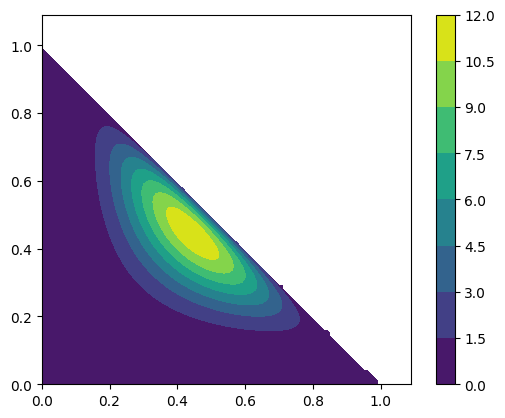

In [4]:
# Illustrate denssity function on a flat triangle.
h = plt.contourf(X, Y, c)
plt.axis('scaled')
plt.colorbar()
plt.show()

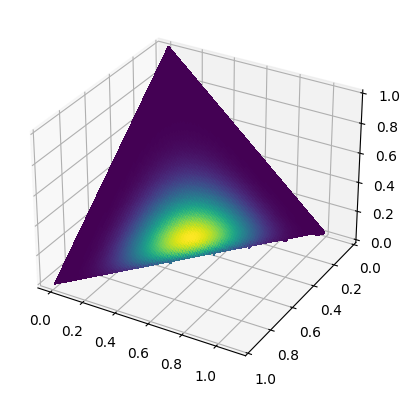

In [5]:
# Illustrate density function on the simplex.
c[Zout] = 0.0
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, facecolors=cm.viridis(c/np.max(c)), linewidth=0, antialiased=False, shade=False)
ax.set_ylim(1,0)
plt.show()